In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)



In [58]:
# Get the Size of Subway data using 
# 1: DataFrame.shape 
# 2: DataFrame.axes
# 3: DataFrame.index and DataFrame.columns

subway_df.shape
#[len(subway_df.axes[0]), len(subway_df.axes[1])]
#[len(subway_df.index), len(subway_df.columns)]

(42649, 27)

In [59]:
# Data Exploration: By examining the first few rows helps me understand the variables, their data types (e.g., numeric, text, 
# date), and the general structure of the dataset.
# For a dataset of 43,000 rows, I should typically look at the first 100 to 500 rows to get a good overview of the data 
# structure, identify potential issues, and understand the data types and values. 
# Display the first 100 rows using
# 1: DataFrame.head(n=5)
# 2: DataFrame.iloc

subway_df.head(10)
#subway_df.iloc[0:10]


,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,5/1/2011,0:00:00,4388333,2911002,0,0,5/1/2011 0:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258000,55.980000,7.86,40.700348,-73.887177
1,R003,5/1/2011,4:00:00,4388333,2911002,0,0,5/1/2011 4:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258000,55.980000,7.86,40.700348,-73.887177
2,R003,5/1/2011,12:00:00,4388333,2911002,0,0,5/1/2011 12:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258000,55.980000,7.86,40.700348,-73.887177
3,R003,5/1/2011,16:00:00,4388333,2911002,0,0,5/1/2011 16:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258000,55.980000,7.86,40.700348,-73.887177
4,R003,5/1/2011,20:00:00,4388333,2911002,0,0,5/1/2011 20:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258000,55.980000,7.86,40.700348,-73.887177
5,R003,5/2/2011,0:00:00,4388348,2911036,15,34,5/2/2011 0:00,0,0,...,30.31,0,50.0,6.9,0.0,30.238333,54.166667,8.25,40.700348,-73.887177
6,R003,5/2/2011,4:00:00,5818689,3874767,19,40,5/2/2011 4:00,4,0,...,30.27,0,50.0,4.6,0.0,30.238333,54.166667,8.25,40.700348,-73.887177
7,R003,5/2/2011,8:00:00,4388855,2911194,488,118,5/2/2011 8:00,8,0,...,30.30,0,53.1,10.4,0.0,30.238333,54.166667,8.25,40.700348,-73.887177
8,R003,5/2/2011,12:00:00,4389345,2911326,490,132,5/2/2011 12:00,12,0,...,30.24,0,57.0,11.5,0.0,30.238333,54.166667,8.25,40.700348,-73.887177
9,R003,5/2/2011,16:00:00,4389576,2911558,231,232,5/2/2011 16:00,16,0,...,30.16,0,59.0,11.5,0.0,30.238333,54.166667,8.25,40.700348,-73.887177


In [12]:
# Investigate data types of each columns
#subway_df.dtypes

In [60]:
# Select Data
r3_r50_df =subway_df.loc[(subway_df['UNIT'] >= 'R003') & (subway_df['UNIT'] <= 'R050'), ['UNIT','DATEn', 'ENTRIESn_hourly']]
#r3_r12_df =subway_df.loc[:,['UNIT','DATEn', 'ENTRIESn_hourly']]
r3_r50_df = r3_r50_df.groupby(['UNIT', 'DATEn'])['ENTRIESn_hourly'].sum().reset_index(name ='Total Riders')
r3_r50_df
#sumdf.groupby(['DATEn'])['ENTRIESn_hourly'].sum()

,UNIT,DATEn,Total Riders
0,R003,5/1/2011,0
1,R003,5/10/2011,1342
2,R003,5/11/2011,1881
3,R003,5/12/2011,1559
4,R003,5/13/2011,1524
...,...,...,...
1235,R050,5/5/2011,26752
1236,R050,5/6/2011,32725
1237,R050,5/7/2011,17033
1238,R050,5/8/2011,11821


In [51]:
# Update 'DATEn' coulmn type(str) to Datetime
r3_r50_df['DATEn'] = pd.to_datetime(r3_r50_df['DATEn'])   

# Check Info of the data
#subway_df.info()
 

In [61]:
r3_r50_df = r3_r50_df.pivot(index='DATEn', columns='UNIT', values='Total Riders')
r3_r50_df
#df.sort_index()


UNIT,R003,R004,R005,R006,R007,R008,R009,R011,R012,R013,...,R038,R039,R040,R041,R042,R043,R044,R046,R049,R050
DATEn,,,,,,,,,,,,,,,,,,,,,
5/1/2011,0,0,2,5,0,0,1,22776,32246,9090,...,917,3653,4839,7162,2970,7766,15086,24592,8022,12837
5/10/2011,1342,4043,4009,4665,3033,2889,2394,53249,62122,15442,...,1504,5885,10886,13452,3469,24238,35611,60003,20501,28962
5/11/2011,1881,3862,3969,3893,2637,1904,1664,50314,57749,22746,...,2403,5773,9271,37304,4745,23749,36914,52865,18413,29872
5/12/2011,1559,3753,3897,5506,2639,3969,3220,51009,55158,18466,...,2006,5777,9437,26864,5403,24806,39112,68406,24474,30296
5/13/2011,1524,4482,3843,4628,2601,2879,2351,50346,70219,20728,...,1872,5662,9231,24752,4311,23437,33618,60382,21632,23749
5/14/2011,771,2343,2243,2598,1499,1526,1365,32133,35391,7481,...,919,4081,5894,1762,439,1547,19010,37103,9838,23812
5/15/2011,590,1527,1612,1867,1152,1106,1007,20935,29454,6283,...,750,3149,4158,15,5,0,12577,23215,7390,14390
5/16/2011,1439,3039,3712,4322,2309,2777,2305,56852,63478,19521,...,960,5557,8701,22891,3030,21040,32762,60030,19427,19696
5/17/2011,1476,4614,3779,4346,2952,2767,2278,61100,64363,20464,...,2907,5584,8687,24263,4328,21815,30741,61625,21348,36079


In [62]:
#r3_r12_df.describe()

In [71]:
# Find the station with the maximum riders on the first day, then return the mean riders per day for that station. Also return 
# the mean ridership overall for comparsion.
max_station_day_1 = r3_r50_df.idxmax(axis=1)[0]
mean_for_max = round(r3_r50_df[max_station_day_1].mean(axis=0), 2)
r3_r50_mean = round(r3_r50_df.values.mean(), 2)
print('Station with the maximum riders on the first day: {0}\nMean riders per day for the station \'{0}\': {1} \nMean ridership overall: {2}'.format(max_station_day_1, mean_for_max, r3_r50_mean))

Station with the maximum riders on the first day: R033
Mean riders per day for the station 'R033': 49504.9 
Mean ridership overall: 20638.27


Correlation between 'ENTRIESn_hourly' vs 'Rain': 0.04
Correlation between 'ENTRIESn_hourly' vs 'Temperature': -0.03
Correlation between 'Rain' vs 'Temperature': -0.23
Correlation between 'ENTRIESn_hourly' vs 'Accumulative Entries': 0.59
       ENTRIESn  ENTRIESn_hourly  meanprecipi  meantempi
4548  114298855            14197          0.0  57.683333
4549  114305213             6358          0.0  57.683333
4550   75763728              759          0.0  57.683333
4551  113138410             4272          0.0  57.683333
4552  113144423             6013          0.0  57.683333
...         ...              ...          ...        ...
4729  156679238             2539          0.0  78.316667
4730  124701946             1523          0.0  78.316667
4731  136564754             7558          0.0  78.316667
4732  135304170             8469          0.0  78.316667
4733  136593390            20167          0.0  78.316667

[186 rows x 4 columns]


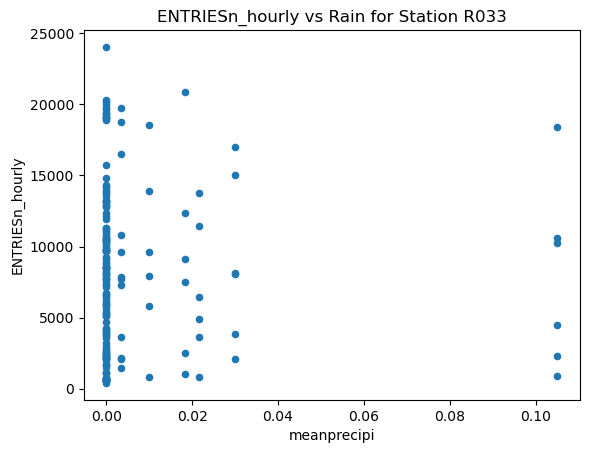

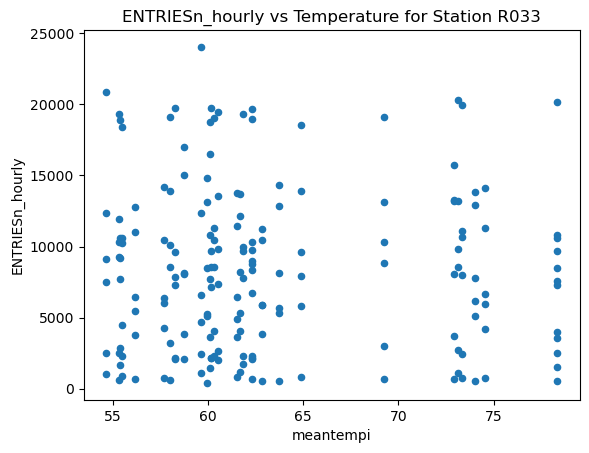

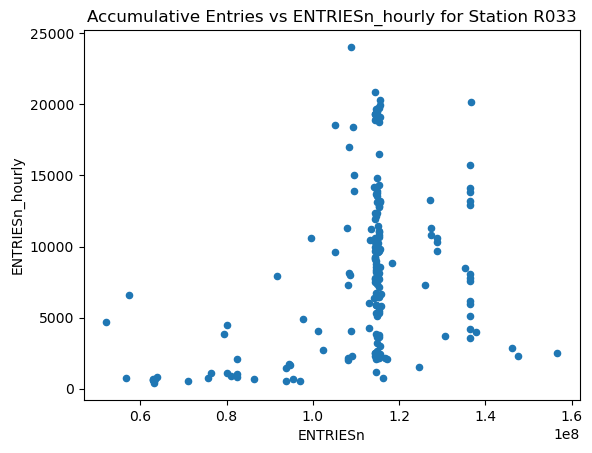

In [99]:
# Function to compute the correlation between the tw0 input variables. Each input is either a NumPy array or a Pandas Series.
# correlation = average of (x in standard units) times (y in standard units)
# Set the argument "ddof=0" in the Pandas std() function
def correlation(x, y):
    cov = np.cov(x, y, ddof=0)[0][1]
    return cov / (x.std(ddof=0) * y.std(ddof=0))
    #return np.corrcoef(x, y)[0][1]
entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']
print('Correlation between \'ENTRIESn_hourly\' vs \'Rain\': {}'.format(round(correlation(entries, rain), 2)))
print('Correlation between \'ENTRIESn_hourly\' vs \'Temperature\': {}'.format(round(correlation(entries, temp), 2)))
print('Correlation between \'Rain\' vs \'Temperature\': {}'.format(round(correlation(rain, temp), 2)))
print('Correlation between \'ENTRIESn_hourly\' vs \'Accumulative Entries\': {}'.format(round(correlation(entries, cum_entries), 2)))

max_entries = subway_df.loc[(subway_df['UNIT'] == max_station_day_1) , ['ENTRIESn', 'ENTRIESn_hourly', 'meanprecipi', 'meantempi']]
print(max_entries)
max_entries.plot(kind = 'scatter', x = 'meanprecipi' , y = 'ENTRIESn_hourly', title='ENTRIESn_hourly vs Rain for Station R033')
plt.show()

max_entries.plot(kind = 'scatter', x = 'meantempi' , y = 'ENTRIESn_hourly', title='ENTRIESn_hourly vs Temperature for Station R033')
plt.show()
max_entries.plot(kind = 'scatter', x = 'ENTRIESn' , y = 'ENTRIESn_hourly', title='Accumulative Entries vs ENTRIESn_hourly for Station R033')
plt.show()